---
> # **BACKTEST** - Estratégia na _ABERTURA do MINI ÍNDICE_
---

A estratégia é assim:

* Timeframe de 1min;
* Indicadores:
  * Média Exponencial de 255, com deslocamento de 1
  * Média Exponencial de 510, com deslocamento de 1
* Sinal de entrada de compra:
  * Média de 255 acima da média de 510
  * Mínima do candle entre as médias ou abaixo da média de 510
* Sinal de entrada de venda:
  * Média de 510 acima da média de 255
  * Máxima do candle entre as médias ou acima da média de 510
* Alvo e stop de 200 pontos;

_OBS.:_
1. Uma única entrada por dia
2. Candle analisado tem que ser o primeiro candle do dia.

_OBS. 2: estratégia retirada do canal do **Pio Trader** no vídeo: [Day Trade : Aprenda esta SIMPLES estratégia na ABERTURA do MINI ÍNDICE Médias Móveis Exponenciais](https://www.youtube.com/watch?v=iXBlOytjU3g)_

# 1. Bibliotecas

In [1]:
# Análise e manipulação de dados gerais
import numpy as np
import pandas as pd

import pandas_ta as ta

# Dados séries temporais
from datetime import datetime, timedelta
import pytz

# Dados OHLCV
from mt5linux import MetaTrader5
from datetime import datetime

# connecto to the server
mt5 = MetaTrader5()
mt5.execute('import datetime')

# Bibliotecas gráficas
import mplfinance as mpf
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# 2. Obtenção dos dados

In [2]:
mt5.initialize()

True

In [3]:
ticker = 'WIN$N'

In [4]:
timezone = pytz.timezone("America/Sao_Paulo")
data_inicio = datetime.now() - timedelta(days=250)
data_fim = datetime.now() - timedelta(1)

In [5]:
dados_ohlcv = mt5.copy_rates_range(ticker, mt5.TIMEFRAME_M1, data_inicio, data_fim)
dados_ohlcv = pd.DataFrame(dados_ohlcv)
dados_ohlcv['ticker'] = str(ticker)
dados_ohlcv['timeframe'] = '01_min'
dados_ohlcv.index = pd.to_datetime(dados_ohlcv['time'], unit='s')
dados_ohlcv = dados_ohlcv.drop('time', axis=1)
dados_ohlcv

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe
time,,,,,,,,,
2022-07-28 15:09:00,102970.0,103015.0,102970.0,103000.0,4064,5,12687,WIN$N,01_min
2022-07-28 15:10:00,103005.0,103035.0,102990.0,103030.0,4862,5,15844,WIN$N,01_min
2022-07-28 15:11:00,103035.0,103045.0,102955.0,102980.0,7015,5,21583,WIN$N,01_min
2022-07-28 15:12:00,102985.0,102985.0,102945.0,102945.0,4474,5,15241,WIN$N,01_min
2022-07-28 15:13:00,102945.0,102965.0,102920.0,102945.0,6653,5,23180,WIN$N,01_min
...,...,...,...,...,...,...,...,...,...
2023-04-03 15:04:00,101260.0,101270.0,101235.0,101245.0,1089,0,10777,WIN$N,01_min
2023-04-03 15:05:00,101245.0,101260.0,101195.0,101225.0,2577,0,32801,WIN$N,01_min
2023-04-03 15:06:00,101230.0,101260.0,101215.0,101225.0,1667,0,15499,WIN$N,01_min


# 3. Configurando os indicadores

In [6]:
data = dados_ohlcv.copy()

data['mm255'] = ta.ema(data.close, length=255, offset=1)
data['mm510'] = ta.ema(data.close, length=510, offset=1)

data['dia'] = pd.to_datetime(data.index.strftime('%Y-%m-%d'), errors='ignore')
data['novo_dia'] = (data.dia != data.dia.shift(1))

data.tail()

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm255,mm510,dia,novo_dia
time,,,,,,,,,,,,,
2023-04-03 15:04:00,101260.0,101270.0,101235.0,101245.0,1089,0,10777,WIN$N,01_min,101439.092297,101737.573657,2023-04-03,False
2023-04-03 15:05:00,101245.0,101260.0,101195.0,101225.0,2577,0,32801,WIN$N,01_min,101437.575951,101735.645776,2023-04-03,False
2023-04-03 15:06:00,101230.0,101260.0,101215.0,101225.0,1667,0,15499,WIN$N,01_min,101435.915202,101733.647163,2023-04-03,False
2023-04-03 15:07:00,101225.0,101275.0,101225.0,101275.0,1411,0,13825,WIN$N,01_min,101434.267427,101731.656371,2023-04-03,False
2023-04-03 15:08:00,101275.0,101345.0,101270.0,101335.0,3600,0,46111,WIN$N,01_min,101433.023150,101729.869067,2023-04-03,False


## 3.1 - Filtrando as entradas de compra e venda

In [7]:
def entrada_compra(low, mm255, mm510, novo_dia):
    regra1 = (mm255 > mm510)
    regra2 = ((low < mm255) & (low > 510)) | (low < mm510)
    regra3 = (novo_dia == True)
    
    return regra1 & regra2 & regra3

def entrada_venda(high, mm255, mm510, novo_dia):
    regra1 = (mm510 > mm255)
    regra2 = ((high > mm255) & (high < 510)) | (high > mm510)
    regra3 = (novo_dia == True)
    
    return regra1 & regra2 & regra3

In [8]:
data['compra'] = entrada_compra(data.low, data.mm255, data.mm510, data.novo_dia)
data['venda'] = entrada_venda(data.high, data.mm255, data.mm510, data.novo_dia)

In [9]:
df_compra = data[data.compra == True]
df_venda = data[data.venda == True]

In [10]:
df_compra.head()

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm255,mm510,dia,novo_dia,compra,venda
time,,,,,,,,,,,,,,,
2022-08-01 09:00:00,103825.0,103830.0,103640.0,103670.0,8273,5,21793,WIN$N,01_min,103959.196397,103812.748801,2022-08-01,True,True,False
2022-08-04 09:00:00,104265.0,104310.0,104170.0,104235.0,11218,5,25707,WIN$N,01_min,104185.750230,104043.467912,2022-08-04,True,True,False
2022-08-15 09:00:00,111500.0,111500.0,111500.0,111500.0,2138,5,12085,WIN$N,01_min,112271.191151,111848.181381,2022-08-15,True,True,False
2022-08-16 09:00:00,113050.0,113100.0,112890.0,112925.0,24809,5,47308,WIN$N,01_min,112993.439381,112703.407373,2022-08-16,True,True,False
2022-08-19 09:00:00,114980.0,114990.0,114850.0,114920.0,21833,5,40180,WIN$N,01_min,115851.959190,115755.032492,2022-08-19,True,True,False


In [11]:
df_venda.head()

,open,high,low,close,tick_volume,spread,real_volume,ticker,timeframe,mm255,mm510,dia,novo_dia,compra,venda
time,,,,,,,,,,,,,,,
2022-08-23 09:00:00,113060.0,113150.0,112960.0,113025.0,19584,5,36906,WIN$N,01_min,112423.695852,112560.118220,2022-08-23,True,False,True
2022-08-30 09:00:00,114395.0,114430.0,114360.0,114405.0,3454,5,9470,WIN$N,01_min,114280.557551,114292.248734,2022-08-30,True,False,True
2022-09-08 09:00:00,111745.0,111930.0,111730.0,111910.0,21321,5,45980,WIN$N,01_min,110990.973101,111337.225460,2022-09-08,True,False,True
2022-09-09 09:00:00,112100.0,112330.0,112020.0,112295.0,25534,5,50990,WIN$N,01_min,111042.163459,111063.607558,2022-09-09,True,False,True
2022-09-22 09:00:00,113480.0,113530.0,113355.0,113430.0,14391,5,31545,WIN$N,01_min,112901.264548,112931.065138,2022-09-22,True,False,True


## 3.2 - Visualizando os pontos de entrada de compra

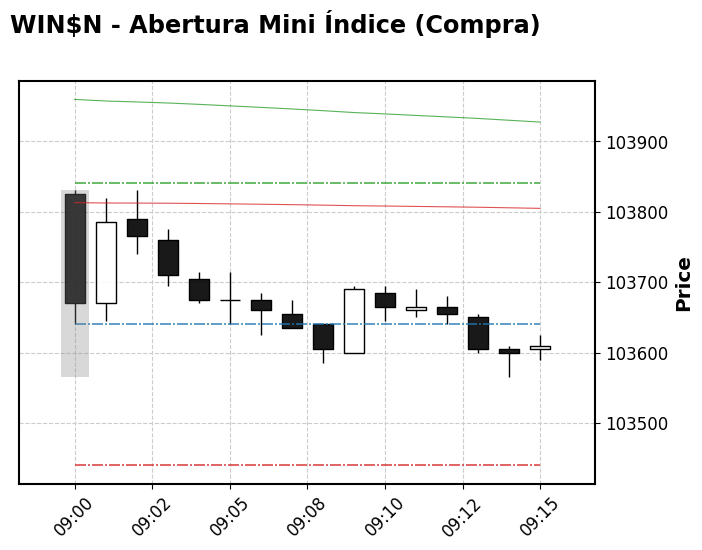

In [12]:
n_index = 0
inicio = df_compra.iloc[n_index].name
fim = df_compra.iloc[n_index].name + timedelta(minutes=15)

stop = 200
take = 200

candle_index = 0

dfpl = data.loc[inicio:fim]

candle_signal = dfpl.index[candle_index].strftime('%Y-%m-%d %H:%M:%S')
candle_end = dfpl.index[-1].strftime('%Y-%m-%d %H:%M:%S')

ponto_entrada = dfpl['low'].loc[candle_signal]
ponto_stop = dfpl['low'].loc[candle_signal] - stop
ponto_take = dfpl['low'].loc[candle_signal] + stop

lines = [[(candle_signal,ponto_stop),(candle_end, ponto_stop)],
         [(candle_signal,ponto_entrada),(candle_end, ponto_entrada)],
         [(candle_signal,ponto_take),(candle_end, ponto_take)]]

adp = [mpf.make_addplot(dfpl.mm255, color='tab:green', width=0.8, alpha=0.8),
      mpf.make_addplot(dfpl.mm510, color='tab:red', width=0.8, alpha=0.8)]

alines = dict(alines=lines, linestyle='-.', colors=['tab:red', 'tab:blue', 'tab:green'], alpha=0.7, linewidths=1.2)
vlines=dict(vlines=candle_signal,linewidths=20, alpha=0.3, colors='tab:gray')
mpf.plot(dfpl, title=f'{ticker} - Abertura Mini Índice (Compra)', type='candle', style='classic', vlines=vlines, alines=alines, addplot=adp)

## 3.3 - Visualizando os pontos de entrada de venda

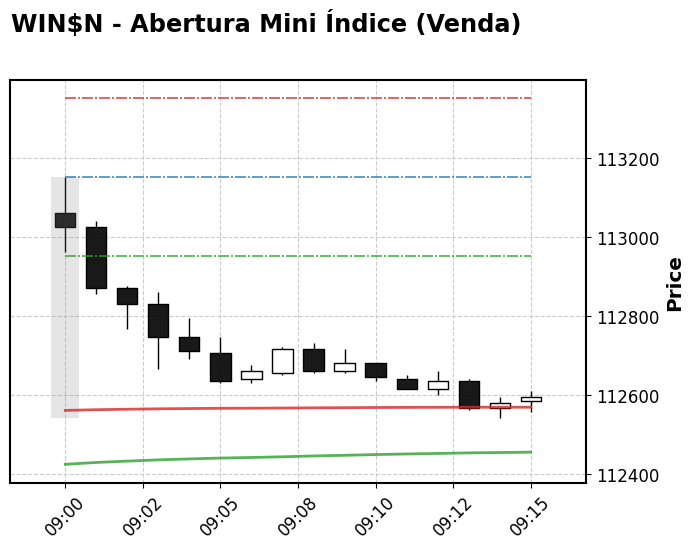

In [13]:
n_index = 0
inicio = df_venda.iloc[n_index].name
fim = df_venda.iloc[n_index].name + timedelta(minutes=15)

stop = 200
take = 200

candle_index = 0

dfpl = data.loc[inicio:fim]

candle_signal = dfpl.index[candle_index].strftime('%Y-%m-%d %H:%M:%S')
candle_end = dfpl.index[-1].strftime('%Y-%m-%d %H:%M:%S')

ponto_entrada = dfpl['high'].loc[candle_signal]
ponto_stop = dfpl['high'].loc[candle_signal] + stop
ponto_take = dfpl['high'].loc[candle_signal] - stop

lines = [[(candle_signal,ponto_stop),(candle_end, ponto_stop)],
         [(candle_signal,ponto_entrada),(candle_end, ponto_entrada)],
         [(candle_signal,ponto_take),(candle_end, ponto_take)]]

adp = [mpf.make_addplot(dfpl.mm255, color='tab:green', width=2, alpha=0.8),
      mpf.make_addplot(dfpl.mm510, color='tab:red', width=2, alpha=0.8)]

alines = dict(alines=lines, linestyle='-.', colors=['tab:red', 'tab:blue', 'tab:green'], alpha=0.7, linewidths=1.2)
vlines=dict(vlines=candle_signal,linewidths=20, alpha=0.2, colors='tab:gray')
mpf.plot(dfpl, title=f'{ticker} - Abertura Mini Índice (Venda)', type='candle', style='classic', vlines=vlines, alines=alines, addplot=adp)

# 4. Realizando o backtest

In [14]:
stop = 200
take = 200

position = 0

ls_data_compra_entrada = []
ls_preco_compra_entrada = []

ls_data_compra_saida = []
ls_preco_compra_saida = []
ls_motivo_compra_saida = []

ls_data_venda_entrada = []
ls_preco_venda_entrada = []

ls_data_venda_saida = []
ls_preco_venda_saida = []
ls_motivo_venda_saida = []

for i in range(len(data)):
    if (position == 0) and (data['compra'].iloc[i] == True):
        pos = i
        ponto_entrada = data['low'].iloc[i]
        stop_loss = ponto_entrada - stop
        take_profit = ponto_entrada + take
        
        while (data.index[pos].hour < 16) and (position == 0):
            pos += 1
            if data['low'].iloc[pos] <= ponto_entrada:
                ls_data_compra_entrada.append(data.index[pos])
                ls_preco_compra_entrada.append(ponto_entrada)
                position = 1
    if (position == 1) and (i >= pos) and (data['low'].iloc[i] <= stop_loss):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(stop_loss)
        position = 0
    if (position == 1) and (i >= pos) and (data['high'].iloc[i] >= take_profit):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(take_profit)
        position = 0
    if (position == 1) and (i >= pos) and (data.index[i].hour >= 17):
        ls_data_compra_saida.append(data.index[i])
        ls_preco_compra_saida.append(data['close'].iloc[i])
        position = 0
        
    if (position == 0) and (data['venda'].iloc[i] == True):
        pos = i
        ponto_entrada = data['high'].iloc[i]
        stop_loss = ponto_entrada + stop
        take_profit = ponto_entrada - take
        
        while (data.index[i].hour < 16) and (position == 0):
            pos += 1
            if data['high'].iloc[pos] >= ponto_entrada:
                ls_data_venda_entrada.append(data.index[pos])
                ls_preco_venda_entrada.append(ponto_entrada)
                position = -1
    if (position == -1) and (i > pos) and (data['high'].iloc[i] >= stop_loss):
        ls_data_venda_saida.append(data.index[i])
        ls_preco_venda_saida.append(stop_loss)
        position = 0
    if (position == -1) and (i > pos) and (data['low'].iloc[i] <= take_profit):
        ls_data_venda_saida.append(data.index[i])
        ls_preco_venda_saida.append(take_profit)
        position = 0
    if (position == -1) and (i > pos) and (data.index[i].hour >= 17):
        ls_data_venda_saida.append(data.index[i])
        ls_preco_venda_saida.append(data['close'].iloc[i])
        position = 0

## 4.1 - Computando os resultados das COMPRAS

In [15]:
tabela_result_compras = pd.DataFrame(zip(ls_data_compra_entrada, ls_preco_compra_entrada, ls_data_compra_saida, ls_preco_compra_saida),
                                    columns=['data_entrada', 'preco_entrada', 'data_saida', 'preco_saida'])
tabela_result_compras['data_entrada'] = pd.to_datetime(tabela_result_compras['data_entrada'], errors='ignore')
tabela_result_compras['data_saida'] = pd.to_datetime(tabela_result_compras['data_saida'], errors='ignore')
tabela_result_compras['resultado'] = tabela_result_compras['preco_saida']/tabela_result_compras['preco_entrada'] - 1
tabela_result_compras['resultado_pontos'] = tabela_result_compras['preco_saida'] - tabela_result_compras['preco_entrada']
tabela_result_compras['tipo'] = 'COMPRA'
tabela_result_compras.tail()

,data_entrada,preco_entrada,data_saida,preco_saida,resultado,resultado_pontos,tipo
26,2023-01-27 09:24:00,114810.0,2023-01-27 09:31:00,114610.0,-0.001742,-200.0,COMPRA
27,2023-02-01 09:01:00,113860.0,2023-02-01 09:04:00,114060.0,0.001757,200.0,COMPRA
28,2023-02-17 09:01:00,111130.0,2023-02-17 10:01:00,111330.0,0.001800,200.0,COMPRA
29,2023-03-17 09:01:00,104240.0,2023-03-17 09:04:00,104040.0,-0.001919,-200.0,COMPRA
30,2023-03-28 09:02:00,100065.0,2023-03-28 09:13:00,100265.0,0.001999,200.0,COMPRA


## 4.2 - Computando os resultados das VENDAS

In [16]:
tabela_result_vendas = pd.DataFrame(zip(ls_data_venda_entrada, ls_preco_venda_entrada, ls_data_venda_saida, ls_preco_venda_saida),
                                    columns=['data_entrada', 'preco_entrada', 'data_saida', 'preco_saida'])
tabela_result_vendas['data_entrada'] = pd.to_datetime(tabela_result_vendas['data_entrada'], errors='ignore')
tabela_result_vendas['data_saida'] = pd.to_datetime(tabela_result_vendas['data_saida'], errors='ignore')
tabela_result_vendas['resultado'] = tabela_result_vendas['preco_entrada']/tabela_result_vendas['preco_saida'] - 1
tabela_result_vendas['resultado_pontos'] = tabela_result_vendas['preco_entrada'] - tabela_result_vendas['preco_saida']
tabela_result_vendas['tipo'] = 'VENDA'
tabela_result_vendas.tail()

,data_entrada,preco_entrada,data_saida,preco_saida,resultado,resultado_pontos,tipo
23,2023-02-28 10:25:00,108045.0,2023-02-28 10:29:00,107845.0,0.001855,200.0,VENDA
24,2023-03-02 09:01:00,106125.0,2023-03-02 09:02:00,105925.0,0.001888,200.0,VENDA
25,2023-03-08 09:09:00,105790.0,2023-03-08 09:19:00,105590.0,0.001894,200.0,VENDA
26,2023-03-14 09:01:00,104700.0,2023-03-14 09:02:00,104500.0,0.001914,200.0,VENDA
27,2023-03-21 09:01:00,102430.0,2023-03-21 09:15:00,102230.0,0.001956,200.0,VENDA


## 4.3 - Computando o resultado final

In [17]:
df_final = pd.concat([tabela_result_compras, tabela_result_vendas])
df_final = df_final.sort_values(by='data_entrada').reset_index(drop=True)
df_final

,data_entrada,preco_entrada,data_saida,preco_saida,resultado,resultado_pontos,tipo
0,2022-08-01 09:05:00,103640.0,2022-08-01 09:38:00,103840.0,0.001930,200.0,COMPRA
1,2022-08-15 09:01:00,111500.0,2022-08-15 09:01:00,111300.0,-0.001794,-200.0,COMPRA
2,2022-08-16 09:05:00,112890.0,2022-08-16 09:12:00,112690.0,-0.001772,-200.0,COMPRA
3,2022-08-19 09:25:00,114850.0,2022-08-19 10:05:00,114650.0,-0.001741,-200.0,COMPRA
4,2022-08-23 10:31:00,113150.0,2022-08-23 10:34:00,113350.0,-0.001764,-200.0,VENDA
5,2022-08-26 11:02:00,114855.0,2022-08-26 11:02:00,114655.0,-0.001741,-200.0,COMPRA
6,2022-08-30 09:01:00,114430.0,2022-08-30 09:28:00,114230.0,0.001751,200.0,VENDA
7,2022-09-05 09:01:00,112200.0,2022-09-05 09:01:00,112400.0,0.001783,200.0,COMPRA
8,2022-09-06 09:01:00,113300.0,2022-09-06 09:10:00,113100.0,-0.001765,-200.0,COMPRA
9,2022-09-08 09:01:00,111930.0,2022-09-08 09:02:00,111730.0,0.001790,200.0,VENDA


# 5. Visualizando o resultado final

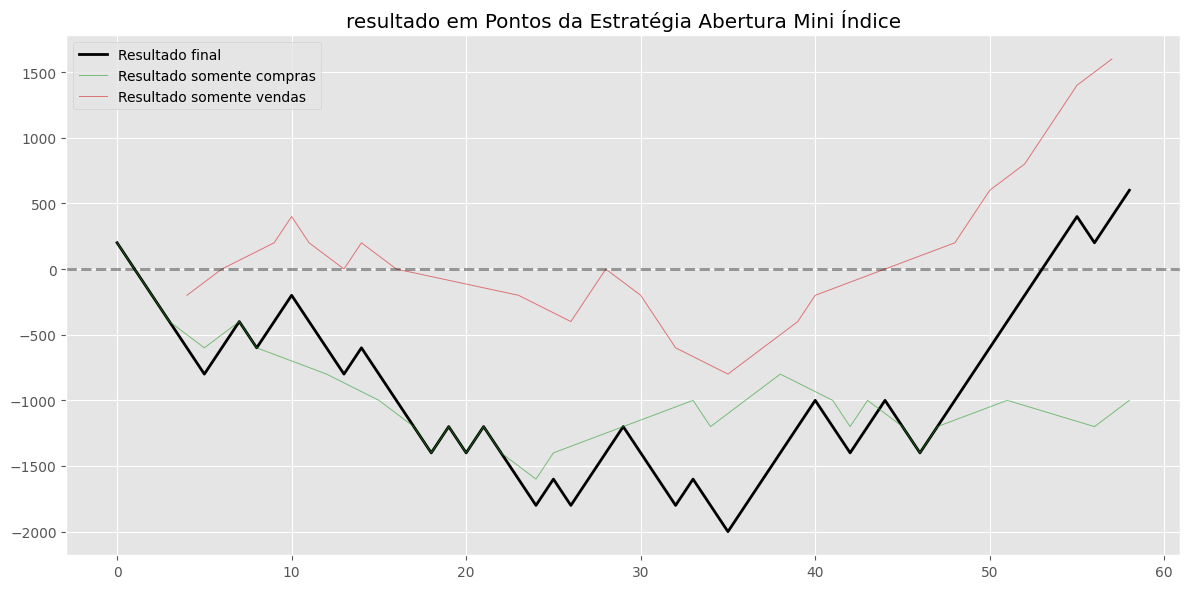

In [18]:
plt.style.use('ggplot')

plt.figure(figsize=(12,6))
plt.title('resultado em Pontos da Estratégia Abertura Mini Índice')
plt.plot(df_final['resultado_pontos'].cumsum(), label='Resultado final', color='black')
plt.plot(df_final[df_final['tipo'] == 'COMPRA']['resultado_pontos'].cumsum(), color='tab:green', label='Resultado somente compras', alpha=0.6, lw=0.7)
plt.plot(df_final[df_final['tipo'] == 'VENDA']['resultado_pontos'].cumsum(), color='tab:red', label='Resultado somente vendas', alpha=0.6, lw=0.7)

plt.axhline(0, color='black', ls='--', alpha=0.4)
plt.legend()
plt.tight_layout()
plt.show();

In [19]:
soma_compra = df_final[df_final['tipo'] == 'COMPRA']['resultado_pontos'].sum()
soma_venda = df_final[df_final['tipo'] == 'VENDA']['resultado_pontos'].sum()

qtd_compra = df_final[df_final['tipo'] == 'COMPRA']['resultado_pontos'].count()
qtd_venda = df_final[df_final['tipo'] == 'VENDA']['resultado_pontos'].count()

print('\n\nBacktest do ABERTURA MINI ÍNDICE')

print(f'\nInício do backtest: {data.index[0]}')
print(f'Fim do backtest: {data.index[-1]}')
print(f'Quantidade de dias: {data.index[-1] - data.index[0]}')

print(f'\nQuantidade total de operações: {len(df_final)}')
print(f'Quantidade de operações de compra: {qtd_compra}')
print(f'Quantidade de operações de venda: {qtd_venda}')

print(f'\nSoma dos pontos de operações de compra: {soma_compra}')
print(f'Soma dos pontos de operações de venda: {soma_venda}')

print(f'\nResultado final: {soma_compra + soma_venda} pontos')
print(f'Média percentual de lucro por trade: {round((df_final["resultado"].mean())*100, 3)}%')
print(f'Média de pontos de lucro por trade: {round(df_final["resultado_pontos"].mean(), 2)} pontos')



Backtest do ABERTURA MINI ÍNDICE

Início do backtest: 2022-07-28 15:09:00
Fim do backtest: 2023-04-03 15:08:00
Quantidade de dias: 248 days 23:59:00

Quantidade total de operações: 59
Quantidade de operações de compra: 31
Quantidade de operações de venda: 28

Soma dos pontos de operações de compra: -1000.0
Soma dos pontos de operações de venda: 1600.0

Resultado final: 600.0 pontos
Média percentual de lucro por trade: 0.012%
Média de pontos de lucro por trade: 10.17 pontos
